# **Tarea de la semana 3**

### 12_Linear_regression
#### Perform linear regressions of salinity vs temperature and dec vs salinity.

In [4]:
# Importamos las librerías y leemos los datos con pandas

def import_csv(file):
    # Read the file into a DataFrame: df
    import pandas as pd
    return pd.read_csv(file)
# Path to the file to be imported
path = "Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
CO2Data = import_csv(path)

In [ ]:
CO2Data.head()

#### Realizamos el codigo para encontrar la regresión lineal simple Salinidad vs Temperatura

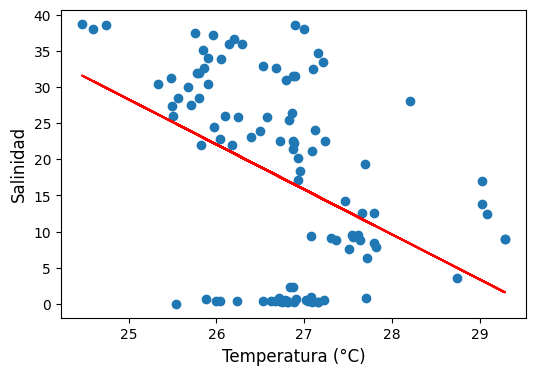

r-squared: 0.17749929096684752
p_value: 6.879907520531154e-06
slope: -6.237079764689512
intercept: 184.22846870564854


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x_temp = CO2Data['temp_c']
y_sal = CO2Data['sal_psu']

plt.scatter(x_temp, y_sal, label='original data')

# Add labels and title
plt.xlabel('Temperatura (°C)', fontsize = 12, )
plt.ylabel('Salinidad (Psu)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_temp, y_sal)

# Plot linear regression 

plt.plot(x_temp, intercept + slope*x_temp, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)


plt.show()

print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

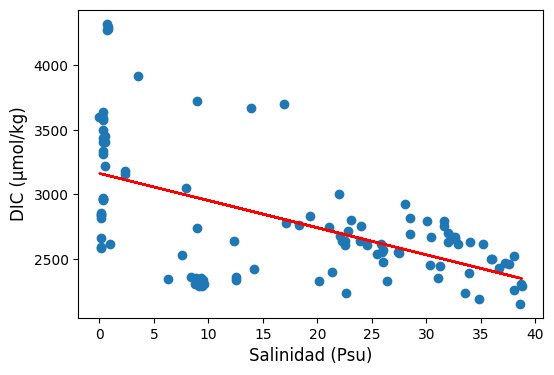

r-squared: 0.32710473310227767
p_value: 1.51441040237653e-10
slope: -21.053197646779633
intercept: 3162.874756459312


In [9]:
x_sal = CO2Data['sal_psu']
y_dic = CO2Data['dic_micromol_kg']

plt.scatter(x_sal, y_dic, label='original data')

# Add labels and title
plt.xlabel('Salinidad (Psu)', fontsize = 12, )
plt.ylabel('DIC (µmol/kg)', fontsize = 12)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x_sal, y_dic)

# Plot linear regression 

plt.plot(x_sal, intercept + slope*x_sal, 'r', label='fitted line')

# set the figure size
plt.gcf().set_size_inches(6, 4)


plt.show()

print("r-squared:", r_value**2)
print("p_value:", p_value)
print("slope:", slope)
print("intercept:", intercept)

### 13_spearman_correlation 
#### Exercise: Create a function to compute the Pearson correlation

In [14]:
from scipy import stats

def test_pearson(x, y, alpha=0.05):
    if len(x) != len(y):
        raise ValueError("Las variables deben tener la misma longitud.")

    rho, pval = stats.pearsonr(x, y)

    print(f"Pearson's correlation coefficient (rho): {rho:.3f}")
    print(f"p-value: {pval:.4f}")

    if pval < alpha:
        print(f"✔️ Significant relationship (p < {alpha:.3f})")
    else:
        print(f"⚠️ No significant relationship (p ≥ {alpha:.3f})")

    if rho > 0:
        print("📈 Positive correlation")
    else:
        print("📉 Negative correlation")

# Se pueden cambiar las variables para probar otras correlaciones
test_pearson(CO2Data["ta_micromol_kg"], CO2Data["dic_micromol_kg"])

Pearson's correlation coefficient (rho): 0.882
p-value: 0.0000
✔️ Significant relationship (p < 0.050)
📈 Positive correlation


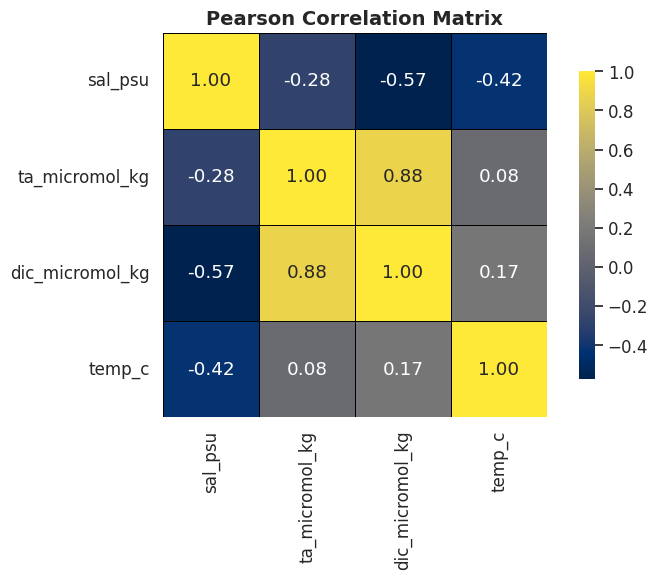

In [22]:
# Plot the Pearson correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

ta_sal_dic_tmp_df = CO2Data[['sal_psu', 'ta_micromol_kg', 'dic_micromol_kg', 'temp_c']]
corr_matrix = ta_sal_dic_tmp_df.corr(method='pearson')

# Plot the heatmap 
plt.figure(figsize=(8, 6))
sns.set(style="white", font_scale=1.1)
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='cividis', 
            square=True, 
            linewidths=0.5, 
            linecolor='black',
            cbar_kws={'shrink': 0.8})

plt.title('Pearson Correlation Matrix', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()